<a href="https://colab.research.google.com/github/mylethidiem/ProgramingTech/blob/main/preAIO25/AIO2024/module5/Logistic_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## • Titanic Survival Prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#download data
!pip install gdown
#get_ipython().system('pip install gdown')

In [ ]:
import gdown

url = 'https://drive.google.com/file/d/1OFgBOb4B1j32uK26vf5urkp8rqVmD_Wf/view?usp=sharing'
output_path = './titanic.zip'
gdown.download(url, output_path, quiet=False,fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1OFgBOb4B1j32uK26vf5urkp8rqVmD_Wf
To: /content/titanic.zip
100%|██████████| 7.00k/7.00k [00:00<00:00, 12.7MB/s]


'./titanic.zip'

In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: titanic_modified_dataset.csv  


In [53]:
dataset_path = 'titanic_modified_dataset.csv'
df = pd.read_csv(
    dataset_path,
    index_col='PassengerId'
)
display(df)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0
...,...,...,...,...,...,...,...,...,...
887,2,0,27.0,0,0,13.0000,0,5,0
888,1,1,19.0,0,0,30.0000,0,2,1
889,3,1,28.0,1,2,23.4500,0,2,0


In [55]:
#df => array, separate two variables X, y
dataset_arr = df.to_numpy().astype(np.float64)
X, y = dataset_arr[:,:-1], dataset_arr[:,-1]
X, y
X.shape, y.shape

((891, 8), (891,))

In [57]:
# add bias
intercept = np.ones((
    X.shape[0],1)
)

X_b = np.concatenate(
    (intercept, X),
    axis=1
)
X_b

array([[ 1.    ,  3.    ,  0.    , ...,  7.25  ,  0.    ,  0.    ],
       [ 1.    ,  1.    ,  1.    , ..., 71.2833,  1.    ,  1.    ],
       [ 1.    ,  3.    ,  1.    , ...,  7.925 ,  0.    ,  2.    ],
       ...,
       [ 1.    ,  3.    ,  1.    , ..., 23.45  ,  0.    ,  2.    ],
       [ 1.    ,  1.    ,  0.    , ..., 30.    ,  1.    ,  0.    ],
       [ 1.    ,  3.    ,  0.    , ...,  7.75  ,  2.    ,  0.    ]])

In [59]:
# train:val:test = 7:2:1
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

#
X_train, X_val, y_train, y_val = train_test_split(
    X_b, y,
    test_size=val_size,
    random_state=random_state,
    shuffle = is_shuffle
)

#
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle = is_shuffle
)
X_train.shape, X_val.shape, y_train.shape, y_val.shape,X_test.shape,y_test.shape

((623, 9), (179, 9), (623,), (179,), (89, 9), (89,))

In [ ]:
# data normalization
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])

X_val[:, 1:] = normalizer.transform(X_val [:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [ ]:
def predict(X, theta):
    dot_product = np.dot(X,theta)
    y_hat = sigmoid(dot_product)
    return y_hat

In [ ]:
# Cross-entropy loss
def compute_loss(y_hat,y):
    #
    y_hat = np.clip(
        y_hat, 1e-7, 1-1e-7
    )
    return (
        -y*\
        np.log(y_hat)-(1-y)*\
        np.log(1-y_hat)
    ).mean()

In [ ]:
# gradient
def compute_gradient(X,y,y_hat):
    return np.dot(
        X.T,( y_hat - y)
    )/y. size

In [ ]:
#update
def update_theta(theta, gradient, lr) :
    return theta - lr*gradient

In [ ]:
def compute_accuracy(X, y, theta) :
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()
    return acc

In [61]:
#initialize
lr = 0.01
epochs = 100
batch_size = 16

#
np.random.seed(random_state)
#
theta = np.random.uniform(
size = X_train . shape [1]
)

In [ ]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

#model train
for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []
    for i in range(0 , X_train.shape[0], batch_size):
        X_i = X_train[i:i+ batch_size]
        y_i = y_train[i:i+ batch_size]

        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_hat, y_i)
        gradient = compute_gradient (X_i, y_i, y_hat)
        theta = update_theta (theta , gradient, lr)

        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        #
        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)


        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    #
    train_batch_loss = sum(train_batch_losses)/len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses)/len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs)/len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs)/len(val_batch_accs)

    #
    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print (f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')


EPOCH 1:	Training loss: 0.703	Validation loss: 0.599

EPOCH 2:	Training loss: 0.670	Validation loss: 0.582

EPOCH 3:	Training loss: 0.640	Validation loss: 0.567

EPOCH 4:	Training loss: 0.614	Validation loss: 0.555

EPOCH 5:	Training loss: 0.592	Validation loss: 0.544

EPOCH 6:	Training loss: 0.572	Validation loss: 0.535

EPOCH 7:	Training loss: 0.554	Validation loss: 0.528

EPOCH 8:	Training loss: 0.539	Validation loss: 0.522

EPOCH 9:	Training loss: 0.526	Validation loss: 0.517

EPOCH 10:	Training loss: 0.514	Validation loss: 0.513

EPOCH 11:	Training loss: 0.504	Validation loss: 0.509

EPOCH 12:	Training loss: 0.495	Validation loss: 0.507

EPOCH 13:	Training loss: 0.487	Validation loss: 0.505

EPOCH 14:	Training loss: 0.480	Validation loss: 0.503

EPOCH 15:	Training loss: 0.474	Validation loss: 0.502

EPOCH 16:	Training loss: 0.468	Validation loss: 0.501

EPOCH 17:	Training loss: 0.463	Validation loss: 0.500

EPOCH 18:	Training loss: 0.459	Validation loss: 0.500

EPOCH 19:	Training

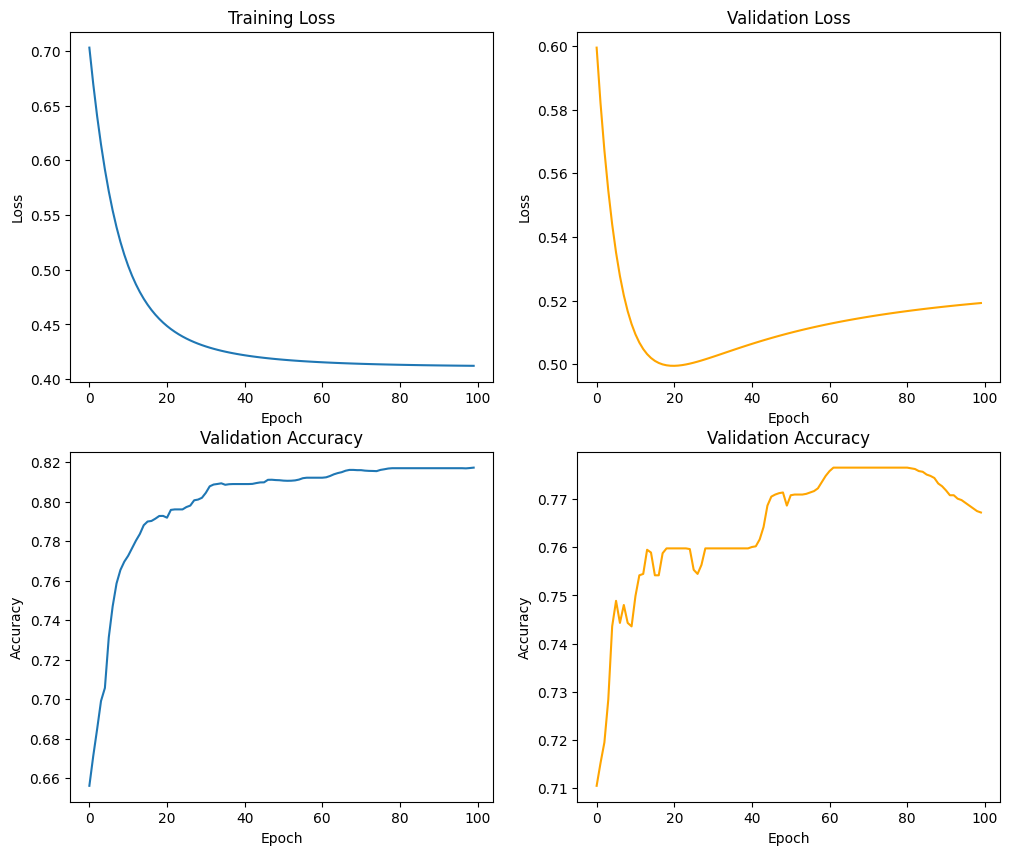

In [ ]:
#Visualize training results on graphs
fig, ax = plt.subplots(2 , 2, figsize =(12 , 10))
ax[0, 0].plot(train_losses )
ax[0, 0].set( xlabel ='Epoch', ylabel ='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel ='Epoch', ylabel ='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel ='Epoch', ylabel ='Accuracy')
ax[1, 0].set_title ('Validation Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel ='Epoch', ylabel ='Accuracy')
ax[1, 1].set_title ('Validation Accuracy')

plt.show()

In [ ]:
#Model Evaluation
val_set_acc = compute_accuracy (X_val, y_val, theta )
test_set_acc = compute_accuracy(X_test, y_test, theta )
print('Evaluation on validation and test set:')
print(f'Accuracy: {val_set_acc}')
print(f'Accuracy: {test_set_acc}')

Evaluation on validation and test set:
Accuracy: 0.770949720670391
Accuracy: 0.7752808988764045


## • Twitter Sentiment Analysis




In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib . pyplot as plt

from sklearn . model_selection import train_test_split
from sklearn . preprocessing import StandardScaler
from nltk . tokenize import TweetTokenizer
from collections import defaultdict

In [ ]:
import gdown

url = 'https://drive.google.com/file/d/1u_lWZPAVIdWG2gsi5myYhdtMoJ3MP0_j/view?usp=sharing'
output_path = './twitter_sentiment_analysis_2cls_dataset.zip'
gdown.download(url, output_path, quiet=False,fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1u_lWZPAVIdWG2gsi5myYhdtMoJ3MP0_j
To: /content/twitter_sentiment_analysis_2cls_dataset.zip
100%|██████████| 471k/471k [00:00<00:00, 88.6MB/s]


'./twitter_sentiment_analysis_2cls_dataset.zip'

In [ ]:
!unzip twitter_sentiment_analysis_2cls_dataset.zip

Archive:  twitter_sentiment_analysis_2cls_dataset.zip
  inflating: sentiment_analysis.csv  


In [62]:
dataset_path = 'sentiment_analysis.csv'
df = pd.read_csv(
  dataset_path ,
  index_col ='id'
)
display(df)

,label,tweet
id,,
1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,0,Finally a transparant silicon case ^^ Thanks t...
3,0,We love this! Would you go? #talk #makememorie...
4,0,I'm wired I know I'm George I was made that wa...
5,1,What amazing service! Apple won't even talk to...
...,...,...
7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7917,0,We would like to wish you an amazing day! Make...
7918,0,Helping my lovely 90 year old neighbor with he...


In [ ]:
#preprocessing data
#normalize
def text_normalize(text):
  # Retweet old acronym "RT" removal
  text = re.sub(r'^RT [\s]+ ', '', text)

  # Hyperlinks removal
  text = re.sub(r'https ?:\/\/.*[\ r\n]*', '', text)

  # Hashtags removal
  text = re.sub(r'#','', text)

  # Punctuation removal
  text = re.sub(r'[^\ w\s]', '', text)

  # Tokenization
  tokenizer = TweetTokenizer(
    preserve_case =False,
    strip_handles =True,
    reduce_len = True
  )
  text_tokens = tokenizer.tokenize(text )

  return text_tokens

In [ ]:
#freqs of words
def get_freqs (df) :
  freqs = defaultdict (lambda: 0)
  for idx, row in df.iterrows() :
    tweet = row['tweet']
    label = row['label']

    tokens = text_normalize(tweet)
    for token in tokens:
      pair = (token, label)
      freqs[pair] += 1

  return freqs

In [ ]:
#feature vector
def get_feature(text, freqs ) :
  tokens = text_normalize(text)

  X = np.zeros(3)
  X[0] = 1

  for token in tokens :
    X[1] += freqs[(token, 0)]
    X[2] += freqs [(token, 1)]

  return X

In [64]:
X = []
y = []

freqs = get_freqs (df)
for idx, row in df. iterrows () :
  tweet = row ['tweet']
  label = row ['label']

  X_i = get_feature(tweet, freqs )
  X.append(X_i)
  y.append(label)

X = np.array(X)
y = np.array(y)

In [ ]:
#train, val, test
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

#
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=val_size,
    random_state=random_state,
    shuffle = is_shuffle
)

#
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle = is_shuffle
)

In [ ]:
# normalize data
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [ ]:
#initialize
lr = 0.01
epochs = 200
batch_size = 128

np.random.seed(random_state)
theta = np.random.uniform (
  size = X_train.shape [1]
)

In [ ]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

#model train
for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []
    for i in range(0 , X_train.shape[0], batch_size):
        X_i = X_train[i:i+ batch_size]
        y_i = y_train[i:i+ batch_size]

        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_hat, y_i)
        gradient = compute_gradient (X_i, y_i, y_hat)
        theta = update_theta (theta , gradient, lr)

        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        #
        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)


        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    #
    train_batch_loss = sum(train_batch_losses)/len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses)/len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs)/len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs)/len(val_batch_accs)

    #
    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print (f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')


EPOCH 1:	Training loss: 0.837	Validation loss: 0.833

EPOCH 2:	Training loss: 0.782	Validation loss: 0.779

EPOCH 3:	Training loss: 0.738	Validation loss: 0.736

EPOCH 4:	Training loss: 0.703	Validation loss: 0.702

EPOCH 5:	Training loss: 0.676	Validation loss: 0.675

EPOCH 6:	Training loss: 0.655	Validation loss: 0.654

EPOCH 7:	Training loss: 0.638	Validation loss: 0.638

EPOCH 8:	Training loss: 0.625	Validation loss: 0.625

EPOCH 9:	Training loss: 0.615	Validation loss: 0.615

EPOCH 10:	Training loss: 0.606	Validation loss: 0.607

EPOCH 11:	Training loss: 0.600	Validation loss: 0.601

EPOCH 12:	Training loss: 0.594	Validation loss: 0.596

EPOCH 13:	Training loss: 0.590	Validation loss: 0.592

EPOCH 14:	Training loss: 0.586	Validation loss: 0.588

EPOCH 15:	Training loss: 0.584	Validation loss: 0.585

EPOCH 16:	Training loss: 0.581	Validation loss: 0.583

EPOCH 17:	Training loss: 0.579	Validation loss: 0.581

EPOCH 18:	Training loss: 0.578	Validation loss: 0.580

EPOCH 19:	Training

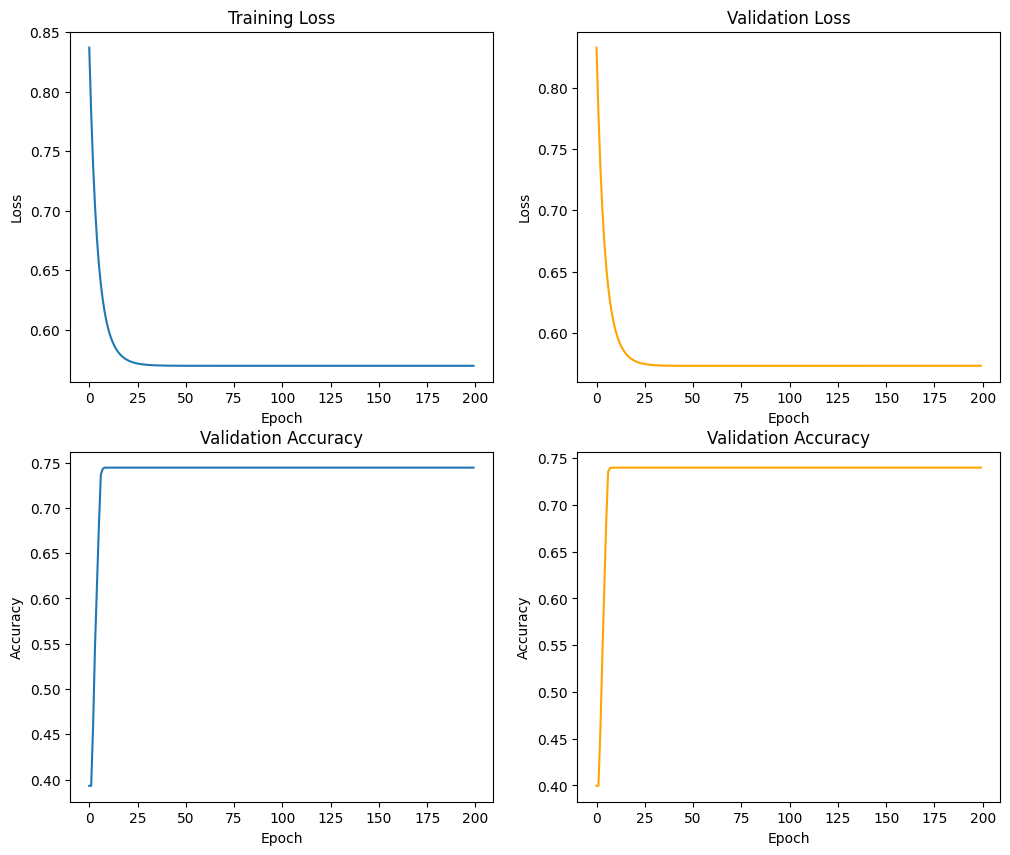

In [ ]:
#Visualize training results on graphs
fig, ax = plt.subplots(2 , 2, figsize =(12 , 10))
ax[0, 0].plot(train_losses )
ax[0, 0].set( xlabel ='Epoch', ylabel ='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel ='Epoch', ylabel ='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel ='Epoch', ylabel ='Accuracy')
ax[1, 0].set_title ('Validation Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel ='Epoch', ylabel ='Accuracy')
ax[1, 1].set_title ('Validation Accuracy')

plt.show()

In [ ]:
val_set_acc = compute_accuracy (X_val , y_val , theta )
test_set_acc = compute_accuracy ( X_test , y_test , theta )
print ('Evaluation on validation and test set :')
print (f'Accuracy : { val_set_acc }')
print (f'Accuracy : { test_set_acc }')

Evaluation on validation and test set :
Accuracy : 0.73989898989899
Accuracy : 0.7512626262626263


Test

In [50]:
#question 13)
X_ = [[22.3, -1.5, 1.1, 1]]
theta_ = [0.1, -0.15, 0.3, -0.2]
y_hat_ = predict(X_, theta_)
y_hat_

array([0.92988994])

In [51]:
#question 14)
y = np.array([1, 0, 0, 1])
y_hat = np.array([0.8, 0.75, 0.3,0.95])

loss = compute_loss(y_hat, y)
loss

0.5043515376900958

In [66]:
#question 17)
def compute_accuracy (y_true , y_pred ) :
  y_pred_rounded = np. round ( y_pred )
  accuracy = np. mean ( y_true == y_pred_rounded)
  return accuracy

y_true = [1, 0, 1, 1]
y_pred = [0.85, 0.35, 0.9, 0.75]

accuracy = compute_accuracy (y_true , y_pred)
accuracy

1.0

In [ ]:
#question 16),18)